# 🌤 Sky Image Classifier – Оновлена версія
Цей ноутбук завантажує ознаки з `sky_features.csv`, тренує класифікатор стану неба з використанням RandomForest та Keras, показує графіки навчання та візуалізує 20 прикладів передбачень на зображеннях.

In [9]:
# 📦 Імпорт бібліотек
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from PIL import Image
import random

In [10]:
# 📄 Завантаження та підготовка даних
df = pd.read_csv("sky_features.csv")
if 'label' not in df.columns:
    df['label'] = df['filename'].apply(lambda x: x.split(os.sep)[0] if os.sep in x else x.split('_')[0])
df.dropna(inplace=True)
print("Унікальні класи:", df['label'].unique())

Унікальні класи: ['cloudy' 'dark' 'partly cloudy' 'sunny' 'sunrise or sunset' 'very cloudy']


In [11]:
# 🎯 Підготовка до моделювання
features = ['cloud_coverage', 'white_pixel_ratio', 'sun_luminance_mean', 'sun_luminance_max', 'hour', 'minute']
X = df[features]
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [12]:
# 🌲 RandomForest для порівняння
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("🎯 RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))

🎯 RandomForest Accuracy: 0.9903474903474904


In [13]:
# 🤖 Побудова нейромережі (Keras)
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train.ravel(), epochs=25, validation_split=0.2, verbose=1)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4756 - loss: 1.5491 - val_accuracy: 0.7277 - val_loss: 0.8854
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.7464 - val_accuracy: 0.8072 - val_loss: 0.5286
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.4460 - val_accuracy: 0.8795 - val_loss: 0.3667
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.3336 - val_accuracy: 0.9133 - val_loss: 0.2939
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9253 - loss: 0.2532 - val_accuracy: 0.9229 - val_loss: 0.2542
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.2206 - val_accuracy: 0.9277 - val_loss: 0.2258
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - loss: 0.1971 - val_accuracy: 0.9108 - val_loss: 0.2185
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1590 - val_accuracy: 0.9301 - val_loss:

🎯 Keras Test Accuracy: 0.97


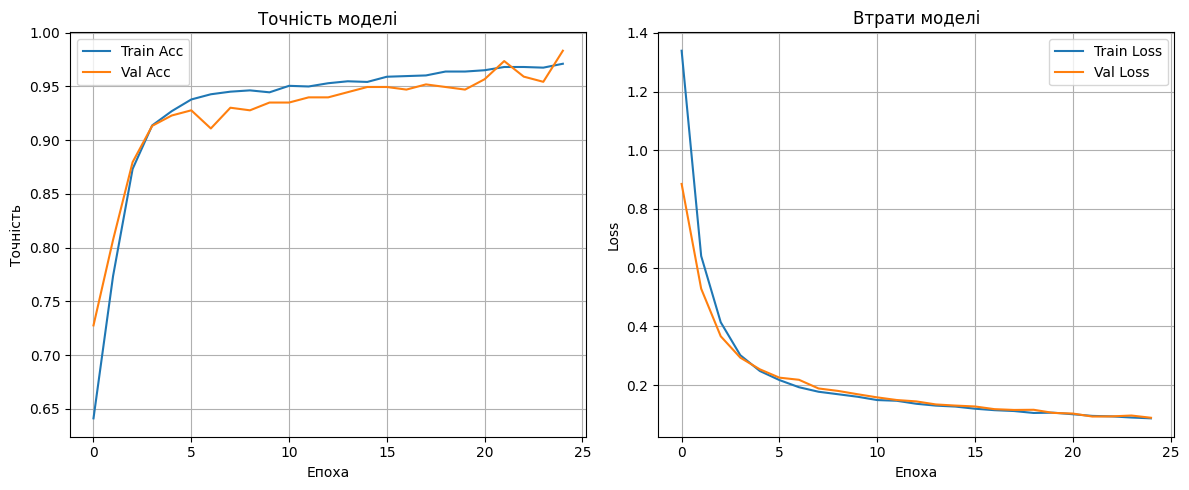

In [14]:
# 📊 Оцінка та графіки точності
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 Keras Test Accuracy: {test_acc:.2f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


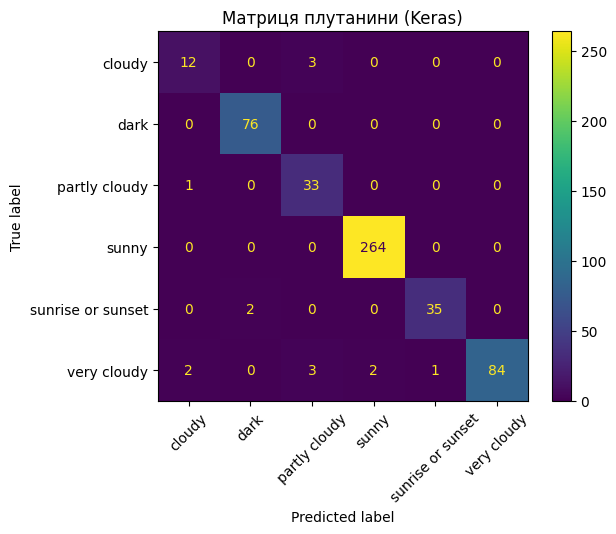

In [15]:
# 📊 Матриця плутанини
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_keras = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_keras, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.title("Матриця плутанини (Keras)")
plt.grid(False)
plt.show()